# Import Library

In [136]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Machine learning algorithms
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

Tahap ini bertujuan untuk mengimpor seluruh pustaka (libraries) Python yang diperlukan dalam proyek machine learning untuk klasifikasi. Import ini mencakup pustaka untuk manipulasi data (pandas, numpy), visualisasi (matplotlib, seaborn), preprocessing (sklearn.preprocessing), algoritma machine learning (XGBoost, Random Forest, SVM, KNN, Decision Tree), validasi model (cross-validation), dan evaluasi performa (accuracy, precision, recall, F1-score).

# Data Loading

In [137]:
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Tahap ini bertujuan untuk memuat dataset diabetes dari file CSV ke dalam DataFrame pandas dan menampilkan 5 baris pertama data

# Data Understanding

* Dataset yang digunakan adalah dataset [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) yang diambil dari platform penyedia data Kaggle. File yang digunakan berekstensi .csv yaitu diabetes.csv.
* Dataset memiliki informasi tentang kondisi diabetes pada wanita suku Indian Pima berusia minimal 21 tahun berdasarkan berbagai fitur medis (jumlah kehamilan, kadar glukosa darah, tekanan darah diastolik, ketebalan lipatan kulit trisep, kadar insulin, indeks massa tubuh, diabetes pedigree function, dan usia).
* Tujuan utama dari Tahap Data Understanding dalam proyek analisis diabetes ini adalah untuk membangun pemahaman yang komprehensif mengenai karakteristik dataset, mengidentifikasi faktor-faktor medis yang berpotensi memengaruhi risiko diabetes, dan mengeksplorasi hubungan antar variabel klinis.

## Exploratory Data Analysis

Pada tahapan Exploratory Data Analysis (EDA), dilakukan pemeriksaan awal terhadap data untuk memahami struktur, pola, dan hubungan antar variabel melalui statistik deskriptif dan visualisasi. Tahapan ini membantu mengidentifikasi data yang hilang, nilai ekstrem, serta potensi hubungan yang dapat dimanfaatkan dalam pemodelan

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Kode `df.info()` digunakan untuk menampilkan ringkasan struktur DataFrame, termasuk jumlah entri, jumlah nilai non-null per kolom, tipe data masing-masing kolom, dan penggunaan memori

In [139]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Kode `df.describe()` digunakan untuk menampilkan statistik deskriptif seperti mean, standar deviasi, nilai minimum, maksimum, dan kuartil (25%, 50%, 75%) dari kolom-kolom numerik dalam DataFrame

In [140]:
print("Missing values:\n", df.isnull().sum().loc[lambda x: x > 0])
print("\nDuplikat:", df.duplicated().sum())

Missing values:
 Series([], dtype: int64)

Duplikat: 0


Kode ini menampilkan jumlah nilai yang hilang di setiap kolom dan menghitung jumlah baris duplikat dalam DataFrame

In [141]:
# split feature
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']

Kode ini memisahkan fitur numerik dan kategorikal ke dalam dua daftar: numerical_features untuk fitur bertipe angka dan categorical_features untuk fitur kategori

### Univariate Analysis

Analisis univariat adalah teknik statistik yang memeriksa satu variabel pada satu waktu untuk menjelaskan karakteristik atau mendeteksi pola dalam data

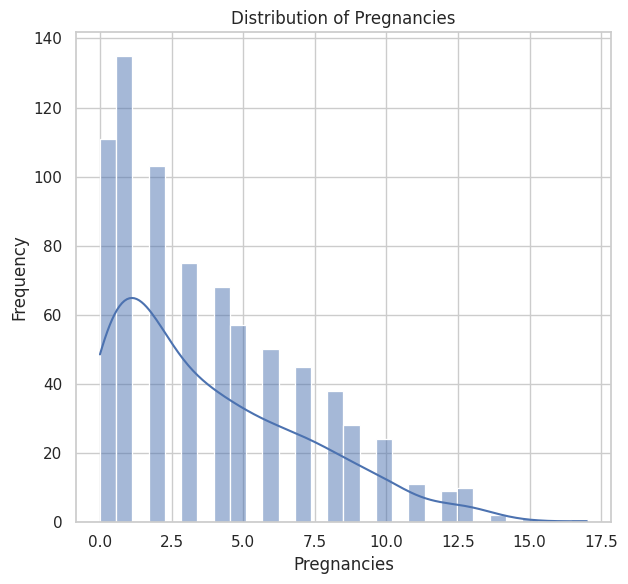


Statistics for Pregnancies:
Skewness: 0.90
Kurtosis: 0.16


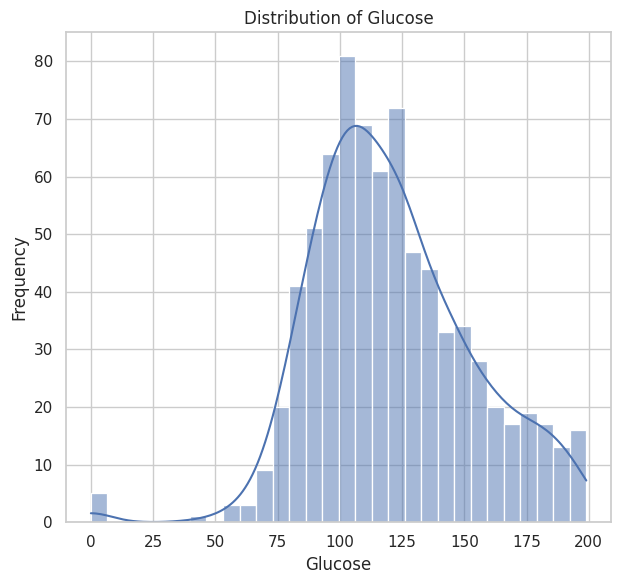


Statistics for Glucose:
Skewness: 0.17
Kurtosis: 0.64


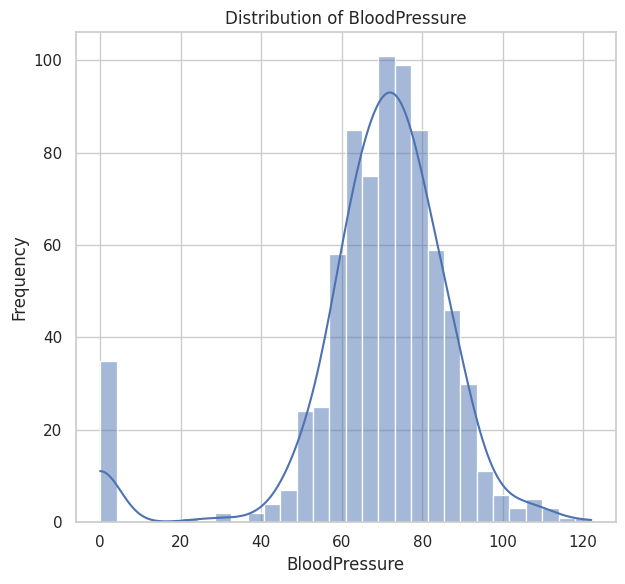


Statistics for BloodPressure:
Skewness: -1.84
Kurtosis: 5.18


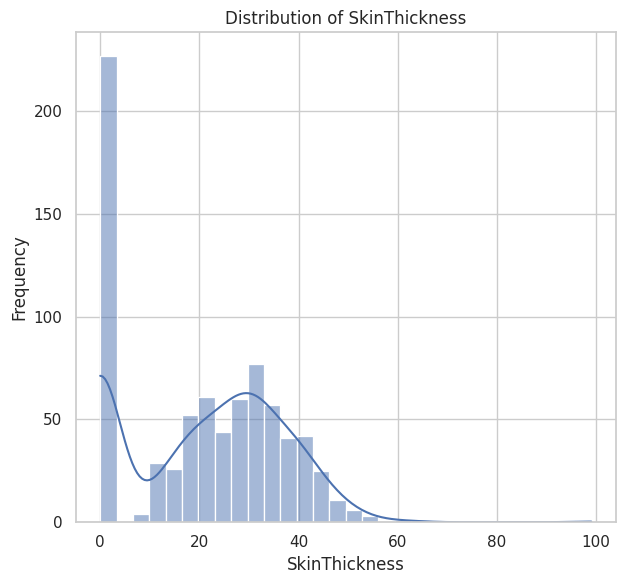


Statistics for SkinThickness:
Skewness: 0.11
Kurtosis: -0.52


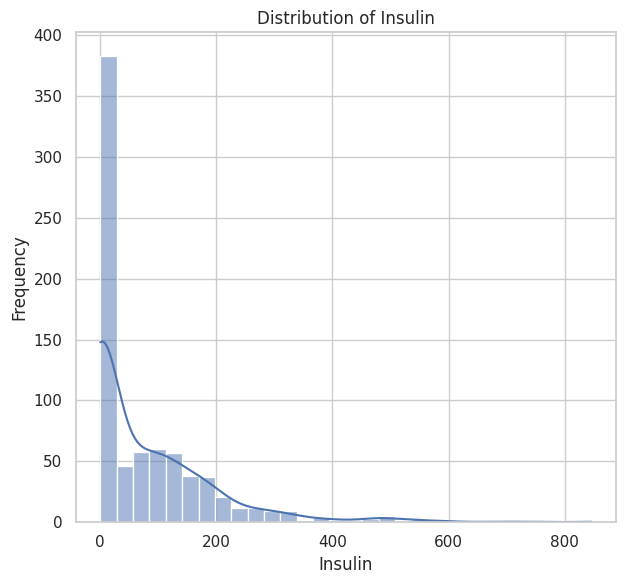


Statistics for Insulin:
Skewness: 2.27
Kurtosis: 7.21


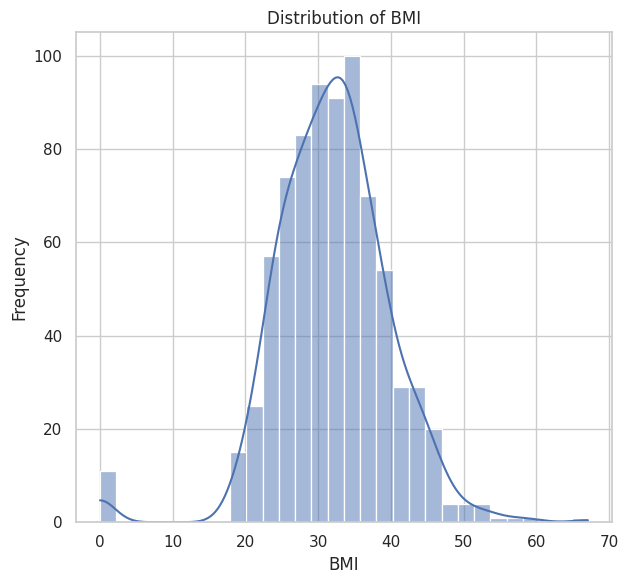


Statistics for BMI:
Skewness: -0.43
Kurtosis: 3.29


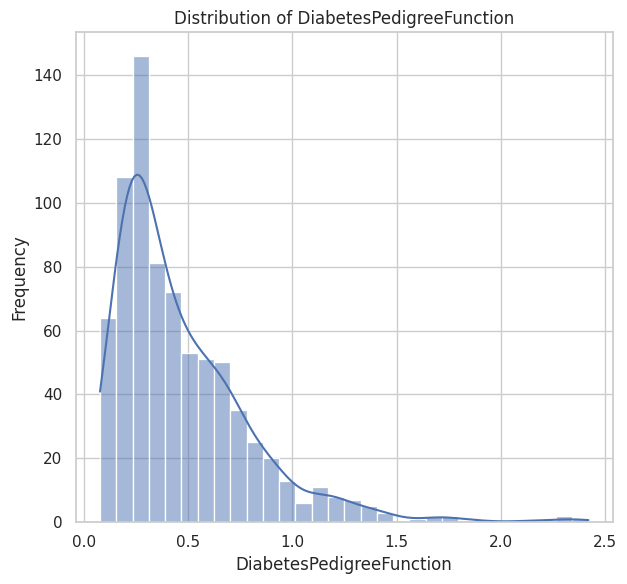


Statistics for DiabetesPedigreeFunction:
Skewness: 1.92
Kurtosis: 5.59


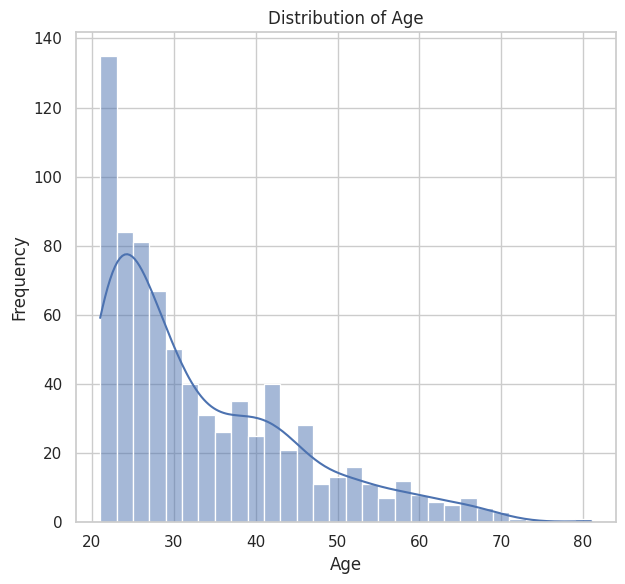


Statistics for Age:
Skewness: 1.13
Kurtosis: 0.64


In [142]:
# Create distribution plots for each numerical variable
for col in numerical_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


    plt.tight_layout()
    plt.show()

    # Print skewness and kurtosis
    print(f"\nStatistics for {col}:")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")


Di atas merupakan distribusi dari masing masing fitur yang digambarkan melalui histogram. Dengan visualisasi ini, kita dapat melihat apakah data terdistribusi secara normal, memiliki kemiringan tertentu (skewness)

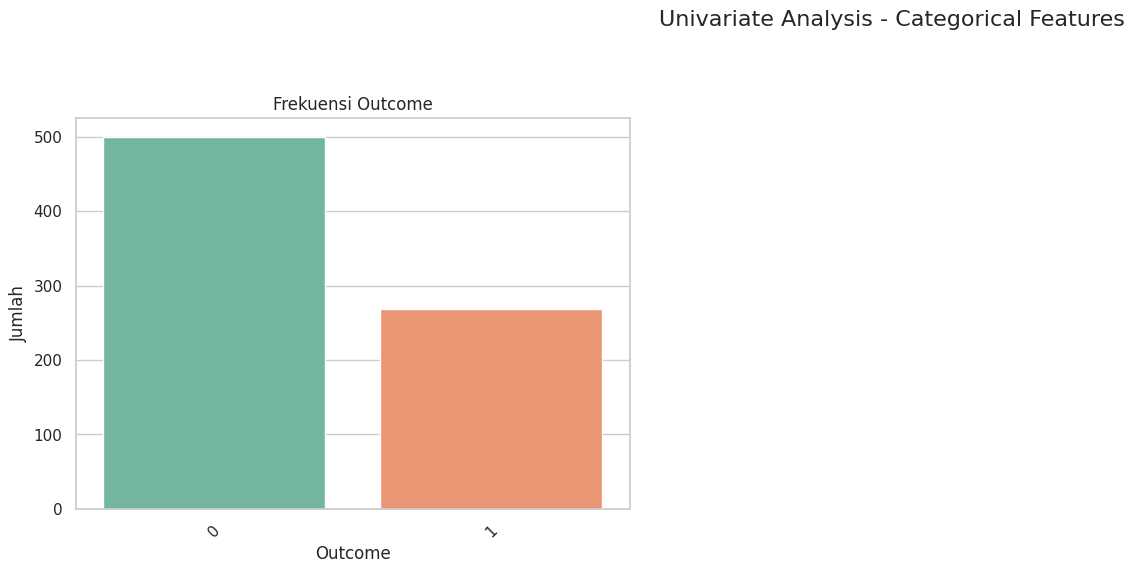

In [143]:
plt.figure(figsize=(18, 10))

# Buat subplot untuk masing-masing fitur kategorikal
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)  # tambahkan hue=col & legend=False
    plt.title(f'Frekuensi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.suptitle('Univariate Analysis - Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Di atas merupakan diagram batang yang didesain secara visual untuk secara jelas menunjukkan frekuensi kemunculan setiap kategori dalam variabel 'Outcome'. Tinggi setiap batang merepresentasikan jumlah atau hitungan observasi untuk kategori tertentu

### Multivariate Analysis

Analisis multivariat adalah teknik statistik yang secara bersamaan memeriksa hubungan antara dua atau lebih variabel untuk mengungkap pola, struktur, atau ketergantungan yang kompleks. Tujuannya adalah untuk memahami bagaimana variabel-variabel tersebut berinteraksi dan saling memengaruhi dalam dataset

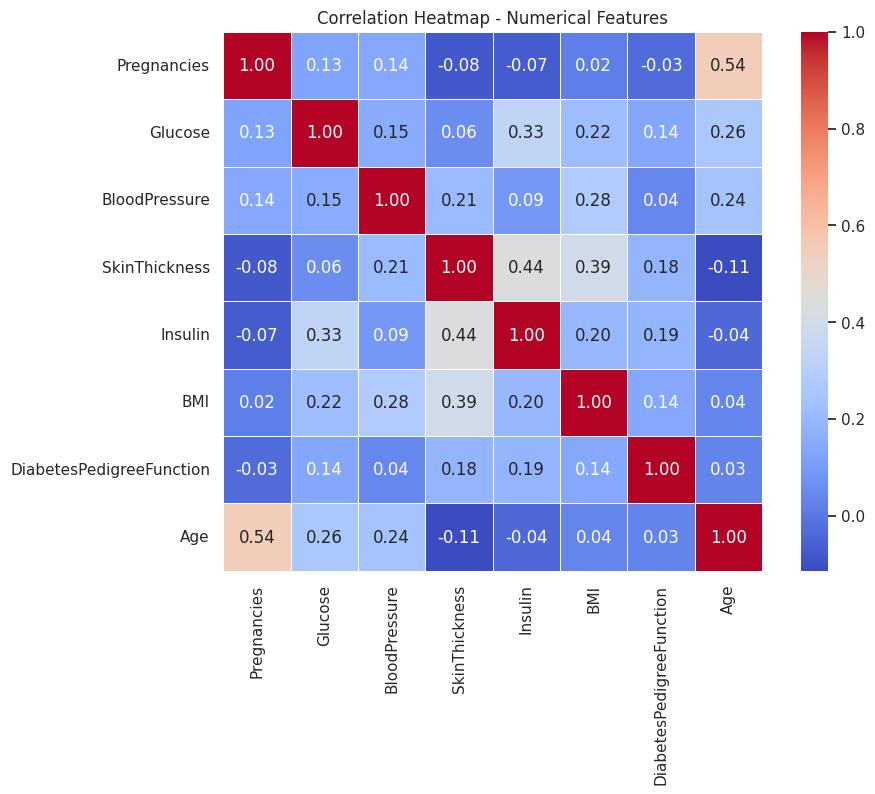

In [144]:
plt.figure(figsize=(10, 7))
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()


Tahapan yang dilakukan dalam kode ini adalah analisis korelasi antara fitur-fitur numerik dalam dataset.

Dari hasil heatmap korelasi yang ditampilkan:

* Korelasi Positif yang Terlihat: Terdapat korelasi positif yang cukup jelas antara beberapa pasangan variabel. Contohnya, 'Pregnancies' memiliki korelasi positif yang signifikan dengan 'Age' (0.54), menunjukkan bahwa jumlah kehamilan cenderung meningkat seiring bertambahnya usia. Demikian pula, 'SkinThickness' memiliki korelasi positif dengan 'Insulin' (0.44) dan 'BMI' (0.39), menyiratkan adanya hubungan antara ketebalan kulit dengan kadar insulin dan indeks massa tubuh. 'Glucose' juga menunjukkan korelasi positif yang moderat dengan 'Insulin' (0.33) dan 'BMI' (0.28).
* Korelasi Negatif atau Lemah: Sebagian besar pasangan fitur lainnya menunjukkan korelasi yang lemah (mendekati nol) atau bahkan negatif. Misalnya, 'Pregnancies' memiliki korelasi negatif kecil dengan 'SkinThickness' (-0.08) dan 'Insulin' (-0.07). Demikian pula, 'Age' memiliki korelasi negatif yang lemah dengan 'SkinThickness' (-0.11). Ini menunjukkan bahwa tidak ada hubungan linear yang kuat atau konsisten antara variabel-variabel tersebut.
* Korelasi Sempurna: Nilai 1.00 pada diagonal utama heatmap adalah normal, karena itu menunjukkan korelasi sempurna antara setiap variabel dengan dirinya sendiri.

# Data Preparation

Persiapan data (data preparation) adalah serangkaian langkah untuk membersihkan, mengubah, dan menyusun data mentah agar siap digunakan untuk analisis atau pemodelan

In [145]:
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_clean:
    df[col] = df[col].replace(0, np.nan)
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

Kode ini melakukan pembersihan data pada beberapa kolom numerik. Nilai 0 (nol) diganti dengan nilai kosong (NaN), karena nilai 0 pada konteks ini dianggap tidak valid (misalnya, tekanan darah tidak mungkin 0). Kemudian, semua nilai kosong (NaN) tersebut diisi dengan nilai median dari kolom yang bersangkutan, sebagai strategi untuk menangani data yang hilang

In [146]:
# Split Data menjadi Train dan Test SEBELUM scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Kode ini melakukan pembagian dataset menjadi data pelatihan (train) dan data pengujian (test) dengan komposisi 8:2

In [147]:
# Scaling/Normalization dilakukan SETELAH split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform hanya pada train
X_test_scaled = scaler.transform(X_test)

Kode ini melakukan scaling/normalisasi data menggunakan `StandardScaler`

In [148]:
print("\nShape setelah split data:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape setelah split data:
X_train: (614, 8), y_train: (614,)
X_test: (154, 8), y_test: (154,)


# Model Development

Pengembangan model (model development) adalah proses memilih, melatih, dan menyempurnakan algoritma pembelajaran mesin menggunakan data yang telah disiapkan. Tujuannya adalah untuk menciptakan model yang mampu membuat prediksi atau keputusan akurat berdasarkan pola yang dipelajari dari data. Disini digunakan lima model klasifikasi dan akan dipilih model terbaik

## XGBoost

XGBoost (Extreme Gradient Boosting) adalah algoritma ensemble learning yang sangat populer dan efisien, berbasis gradient boosting yang menggunakan decision tree sebagai base learner. Kelebihannya meliputi performa yang sangat tinggi dalam berbagai tugas (klasifikasi, regresi), kemampuan menangani data yang tidak seimbang dan nilai hilang secara otomatis, serta optimasi paralel yang membuatnya cepat dalam komputasi bahkan untuk dataset besar. Namun, kekurangannya adalah memiliki banyak hyperparameter yang membutuhkan penyesuaian (tuning) yang cermat dan bisa memakan waktu untuk mendapatkan hasil optimal, serta cenderung lebih kompleks dan kurang interpretable dibandingkan model sederhana seperti decision tree tunggal

In [149]:
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
ratio = neg_count / pos_count

xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=ratio
)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Decision Tree

Decision Tree adalah algoritma pembelajaran mesin non-parametrik yang memodelkan keputusan dalam bentuk struktur pohon, di mana setiap node internal mewakili fitur/atribut, cabang mewakili aturan keputusan, dan node daun mewakili hasil atau kelas. Kelebihannya adalah mudah diinterpretasikan dan divisualisasikan, dapat menangani data kategorikal maupun numerik tanpa pra-pemrosesan yang ekstensif (seperti penskalaan), serta relatif cepat dalam prediksi. Namun, kekurangannya adalah cenderung mudah overfit pada data pelatihan jika tidak dikontrol, rentan terhadap perubahan kecil dalam data yang dapat menghasilkan pohon yang sangat berbeda, dan seringkali menghasilkan prediksi yang kurang akurat dibandingkan metode ensemble yang lebih kompleks

In [150]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Random Forest

Random Forest adalah algoritma ensemble learning yang membangun banyak decision tree secara independen dan menggabungkan prediksinya (melalui voting untuk klasifikasi atau rata-rata untuk regresi) untuk menghasilkan hasil akhir yang lebih akurat dan stabil. Kelebihannya meliputi performa yang kuat dan robust terhadap overfitting (karena averaging), dapat menangani jumlah fitur yang besar dan nilai hilang, serta secara implisit melakukan pemilihan fitur penting. Namun, kekurangannya adalah kurang dapat diinterpretasikan dibandingkan dengan Decision Tree tunggal karena sifat ensemble-nya yang kompleks, serta bisa menjadi komputasi yang mahal dan memori intensif jika jumlah pohon sangat banyak.

In [151]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    max_depth=None,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## SVM

SVM (Support Vector Machine) adalah algoritma pembelajaran yang kuat yang bekerja dengan mencari hyperplane optimal di ruang berdimensi tinggi untuk memisahkan kelas-kelas data atau meregresikan nilai, seringkali menggunakan teknik kernel untuk menangani hubungan non-linear. Kelebihannya adalah efektif dalam ruang berdimensi tinggi, sangat baik untuk masalah klasifikasi dengan batas keputusan yang jelas, dan relatif robust terhadap overfitting jika parameter kernel dan regulasi diatur dengan baik. Namun, kekurangannya adalah bisa menjadi lambat dan menguras memori untuk dataset yang sangat besar, sensitif terhadap outlier, dan kurang interpretable dibandingkan model berbasis pohon

In [152]:
svm_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

## KNN

KNN (K-Nearest Neighbors) adalah algoritma pembelajaran non-parametrik yang melakukan klasifikasi atau regresi berdasarkan kedekatan dengan tetangga terdekat dalam ruang fitur, di mana output untuk suatu titik data baru ditentukan oleh mayoritas kelas (untuk klasifikasi) atau rata-rata nilai (untuk regresi) dari 'K' tetangga terdekatnya. Kelebihannya adalah sederhana dan mudah diimplementasikan, tidak membuat asumsi tentang distribusi data, serta efektif untuk dataset kecil dengan dimensi rendah. Namun, kekurangannya adalah bisa menjadi sangat lambat pada dataset besar (karena perlu menghitung jarak ke semua titik data pelatihan), sensitif terhadap skala fitur dan outlier, serta kinerja sangat bergantung pada pemilihan nilai 'K' yang tepat

In [153]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2  # Euclidean distance
)

knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# Evaluasi

Evaluasi model adalah proses menilai kinerja dan keandalan model yang telah dilatih menggunakan metrik yang relevan pada data yang belum pernah dilihat model sebelumnya. Tujuannya adalah untuk mengukur seberapa baik model dapat menggeneralisasi dan membuat prediksi akurat pada data baru. Metrik yang digunakan disini adalh akurasi, presisi, recall, f1 score. Pada kode di bawah ini, setiap hasil evaluasi disimpan dalam variabel results dan digabungkan menjadi dataframe

In [154]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}

In [155]:
# Prediksi dengan model XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb)
}

results['XGBoost']

{'Accuracy': 0.7402597402597403,
 'Precision': 0.6346153846153846,
 'Recall': 0.6111111111111112,
 'F1-Score': 0.6226415094339622}

In [156]:
y_pred_dt = dt_model.predict(X_test_scaled)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
}

results['Decision Tree']

{'Accuracy': 0.7597402597402597,
 'Precision': 0.639344262295082,
 'Recall': 0.7222222222222222,
 'F1-Score': 0.6782608695652174}

In [157]:
y_pred_rf = rf_model.predict(X_test_scaled)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}

results['Random Forest']

{'Accuracy': 0.7792207792207793,
 'Precision': 0.717391304347826,
 'Recall': 0.6111111111111112,
 'F1-Score': 0.66}

In [158]:
y_pred_svm = svm_model.predict(X_test_scaled)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm)
}

results['SVM']

{'Accuracy': 0.7402597402597403,
 'Precision': 0.6521739130434783,
 'Recall': 0.5555555555555556,
 'F1-Score': 0.6}

In [159]:
y_pred_knn = knn_model.predict(X_test_scaled)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn)
}

results['KNN']

{'Accuracy': 0.7532467532467533,
 'Precision': 0.66,
 'Recall': 0.6111111111111112,
 'F1-Score': 0.6346153846153846}

## Perbandingan Algoritma

Pada tahapan inilah dilakukan evaluasi kinerja berbagai model pada tugas yang sama menggunakan metrik standar. Tujuannya adalah untuk mengidentifikasi algoritma mana yang paling optimal dalam memecahkan masalah spesifik berdasarkan data yang tersedia.

In [160]:
# Konversi ke DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Hasil Evaluasi Model:")
results_df

Hasil Evaluasi Model:


,Accuracy,Precision,Recall,F1-Score
XGBoost,0.740260,0.634615,0.611111,0.622642
Decision Tree,0.759740,0.639344,0.722222,0.678261
Random Forest,0.779221,0.717391,0.611111,0.660000
SVM,0.740260,0.652174,0.555556,0.600000
KNN,0.753247,0.660000,0.611111,0.634615


<Figure size 1200x600 with 0 Axes>

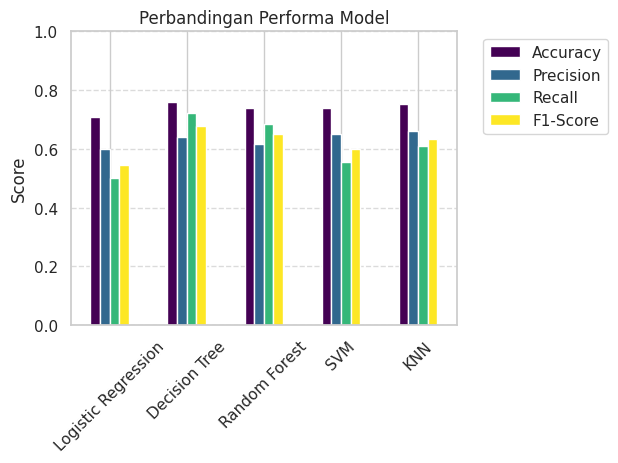

In [ ]:
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', colormap='viridis', rot=45)
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Setelah melalui serangkaian eksperimen dan evaluasi terhadap berbagai algoritma klasifikasi, termasuk XGBoost, Decision Tree, Random Forest, SVM, dan K-Nearest Neighbors (KNN), **Random Forest** terpilih sebagai model yang paling menjanjikan untuk tugas klasifikasi ini.

Keputusan ini didasarkan pada kinerja superior Random Forest, terutama dalam metrik **Accuracy** dan **Precision**. Dengan Accuracy sebesar 0.779221, Random Forest menunjukkan kemampuan terbaik dalam mengklasifikasikan data secara keseluruhan dengan benar. Selain itu, nilai Precision yang mencapai 0.717391 mengindikasikan bahwa ketika Random Forest memprediksi kelas positif, sebagian besar prediksi tersebut memang benar, yang sangat penting dalam skenario di mana *false positive* perlu diminimalkan. Meskipun Recall-nya (0.611111) setara dengan XGBoost, kombinasi Accuracy dan Precision yang tinggi menjadikan Random Forest pilihan yang lebih unggul.

Keunggulan Random Forest terletak pada pendekatannya sebagai *ensemble learning* yang membangun banyak *decision tree* secara independen. Dengan menggabungkan hasil prediksi dari berbagai pohon, Random Forest mampu mengurangi risiko *overfitting* yang sering terjadi pada *decision tree* tunggal, serta meningkatkan stabilitas dan akurasi model secara keseluruhan. Kemampuannya untuk menangani variasi data yang kompleks dan memberikan hasil yang robust menjadi faktor kunci dalam performanya yang baik.

Sebaliknya, model SVM dan XGBoost menunjukkan kinerja yang sedikit lebih rendah pada metrik Accuracy dan F1-Score dibandingkan Random Forest, meskipun SVM memiliki Precision yang cukup baik. Decision Tree dan KNN menunjukkan kinerja yang kompetitif, namun Random Forest tetap memimpin dalam hal akurasi keseluruhan dan presisi prediksi kelas positif.

Secara keseluruhan, terpilihnya Random Forest sebagai algoritma terbaik mengimplikasikan bahwa model ini memiliki potensi terbesar untuk memberikan prediksi klasifikasi yang akurat dan dapat diandalkan berdasarkan fitur-fitur yang tersedia. Ini menjadi landasan yang kuat untuk pengembangan lebih lanjut dan penerapan model dalam konteks yang memerlukan klasifikasi yang presisi.